In [1]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()



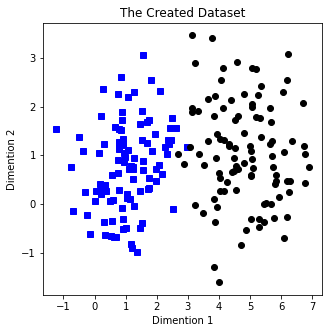

In [3]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The Created Dataset')
plt.xlabel('Dimention 1')
plt.ylabel('Dimention 2')
plt.show();

In [4]:
def createdANNmodel(learningrate):
    
    ANNclassify = nn.Sequential(nn.Linear(2,1),nn.ReLU(),nn.Linear(1,1))
    
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningrate)
    
    return ANNclassify,lossfun,optimizer
    
    

In [5]:
numepochs = 1000

def trainTheModel(ANNmodel):
    losses = torch.zeros(numepochs)
    
    for epochi in range(numepochs):
        
        yHat = ANNmodel(data)
        
        loss = lossfun(yHat,labels)
        losses[epochi] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = ANNmodel(data)
    
    totalacc = 100*torch.mean(((predictions>0) == labels).float())
    return losses,predictions,totalacc

Final Acc 93.5%


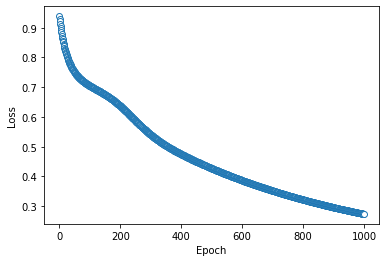

In [6]:
ANNclassify,lossfun,optimizer = createdANNmodel(0.01)

losses, predictions,totalacc = trainTheModel(ANNclassify)

print('Final Acc %g%%' %totalacc)

plt.plot(losses.detach(),'o',markerfacecolor='w')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [7]:
learningrates = np.linspace(0.001,0.1,40)

accByLR= []
allLosses = np.zeros((len(learningrates),numepochs))

for i,lr in enumerate(learningrates):
    ANNclassify,lossfun,optimizer = createdANNmodel(lr)
    losses,predictions,totalacc = trainTheModel(ANNclassify)
    
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()
    

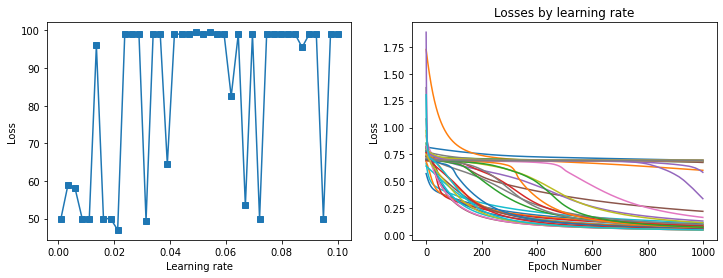

In [10]:
fig , ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Loss')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch Number')
ax[1].set_ylabel('Loss')
plt.show();

In [11]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.6750)

In [13]:
numExps = 50
accMeta = np.zeros((numExps,len(learningrates)))

numepochs = 500

for epochi in range(numExps):
    for i,lr in enumerate(learningrates):
        ANNclassify,lossfun,optimizer = createdANNmodel(lr)
        losses,predictions,totalacc = trainTheModel(ANNclassify)
        
        accMeta[epochi,i] = totalacc
        
    

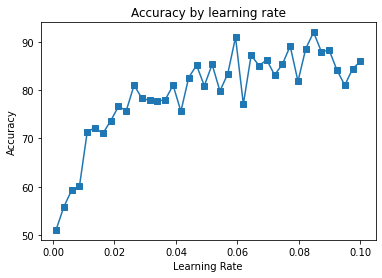

In [14]:
plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show();